In [74]:
import math
import statistics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *
import warnings
warnings.filterwarnings('ignore')





In [3]:

df4 = pd.read_excel('/Users/roumyadas/Downloads/game_sales_data.xlsx')

In [4]:
df4.shape

(19600, 9)

In [5]:
df4.head(2)

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985


In [6]:
sum(df4.Name.isna())+sum(df4.Platform.isna())+sum(df4.Publisher.isna())+sum(df4.Developer.isna())

2

In [7]:
df4 = df4.drop(labels='Rank',axis=1)
df4_na_dropped = df4.dropna(subset=['Developer','Name','Platform','Publisher'])
df4_na_dropped_cont = df4.iloc[:,4:9]
df4_na_dropped_cat = df4.iloc[:,0:4]

In [8]:
df4_na_dropped_cat = df4_na_dropped_cat.applymap(str)
df4_na_dropped_cat.dtypes

Name         object
Platform     object
Publisher    object
Developer    object
dtype: object

In [9]:
df4_na_dropped_cat.head(2)

,Name,Platform,Publisher,Developer
0,Wii Sports,Wii,Nintendo,Nintendo EAD
1,Super Mario Bros.,NES,Nintendo,Nintendo EAD


In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [11]:
#df4_cat_enc = pd.get_dummies(df4_na_dropped_cat, columns = df4_na_dropped_cat.columns)
#lab_enc = LabelEncoder().fit_transform
df4_cat_enc = df4_na_dropped_cat.apply(LabelEncoder().fit_transform)
#y_test_enc = lab_enc.fit_transform(y_test)

In [12]:
df4_cat_enc.head(2)

,Name,Platform,Publisher,Developer
0,13047,31,615,1850
1,11042,13,615,1850


In [13]:
df4_final_enc = pd.merge(df4_na_dropped_cont, df4_cat_enc,left_index=True, right_index=True )

In [14]:
df4_final_enc

,Critic_Score,User_Score,Total_Shipped,Year,Name,Platform,Publisher,Developer
0,7.7,8.0,82.90,2006,13047,31,615,1850
1,10.0,8.2,40.24,1985,11042,13,615,1850
2,8.0,7.5,40.00,2012,1977,16,929,2826
3,8.2,9.1,37.32,2008,6620,31,615,1850
4,8.6,4.7,36.60,2017,8325,16,655,1953
...,...,...,...,...,...,...,...,...
19595,NaN,NaN,0.01,2004,3815,16,309,2364
19596,9.4,NaN,0.01,2003,12241,16,916,2770
19597,NaN,NaN,0.01,2002,603,20,153,477
19598,NaN,NaN,0.01,2017,12214,25,729,2188


In [15]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
df4_after_imputation = imputer.fit_transform(df4_final_enc)

df4_after_imputation = pd.DataFrame(df4_after_imputation)

In [16]:
df4_final_cont = df4_after_imputation.iloc[:,0:4]
df4_final_cat = df4_na_dropped_cat

df4_final = pd.merge( df4_final_cat, df4_final_cont,left_index=True, right_index=True)

#df4_final = pd.DataFrame(df4_final)


#columns=['Name','Platform','Publisher','Developer','Critic_Score',\
                                            # 'User_Score','Total_Shipped','Year']

In [17]:
#df4_after_imputation.head(2)

In [18]:
#df4_final = pd.merge(df4_na_dropped_cat,df4_after_imputation, left_index=True, right_index=True)

In [19]:
column_indices = [4,5,6,7]
new_names = ['Critic_Score','User_Score','Total_Shipped','Year']
old_names = df4_final.columns[column_indices]
df4_final.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [20]:
df4_final.isna()

,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
19595,False,False,False,False,False,False,False,False
19596,False,False,False,False,False,False,False,False
19597,False,False,False,False,False,False,False,False
19598,False,False,False,False,False,False,False,False


In [21]:
df4_final.to_csv('/Users/roumyadas/Desktop/game_sale.csv')

In [22]:
df4 = pd.read_csv('/Users/roumyadas/Desktop/game_sale.csv')

Shape of your Data Set loaded: (19600, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Unnamed: 0,19600,int64,0,0.000000,100.000000,0,possible ID column: drop
Name,13612,object,0,0.000000,69.448980,1,combine rare categories
Developer,3054,object,2,0.010204,15.581633,1,"combine rare categories, fill missing, fix mixed data types"
Publisher,1012,object,0,0.000000,5.163265,1,combine rare categories
Total_Shipped,664,float64,0,0.000000,3.387755,0,highly skewed: drop outliers or do box-cox transform
User_Score,346,float64,0,0.000000,1.765306,0,
Critic_Score,341,float64,0,0.000000,1.739796,0,
Year,44,float64,0,0.000000,0.224490,0,
Platform,37,object,0,0.000000,0.188776,1,combine rare categories


    9 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
Number of All Scatter Plots = 10


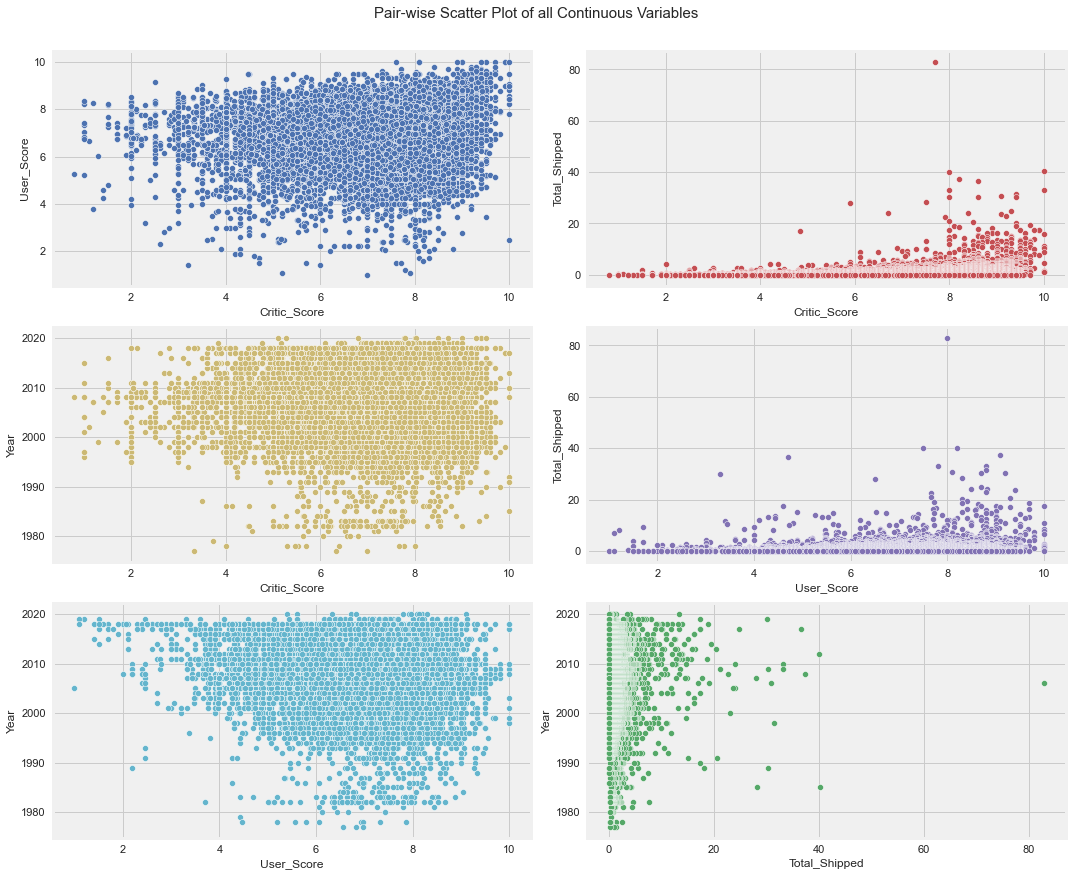

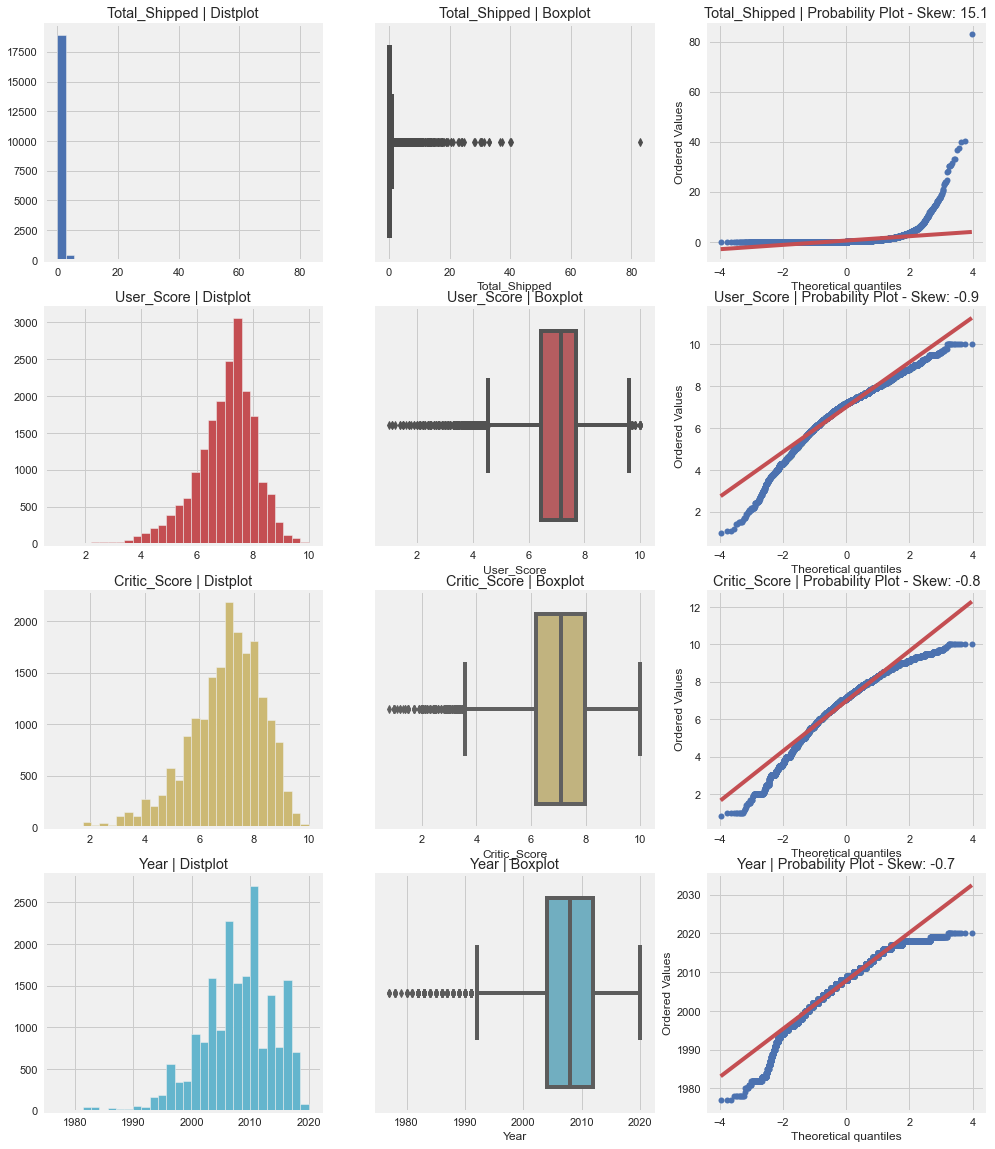

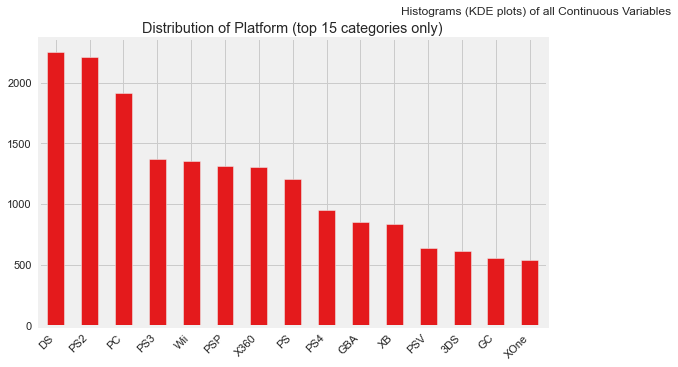

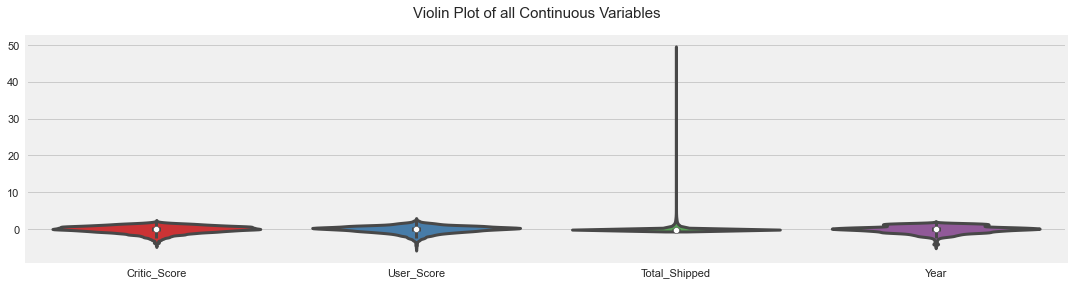

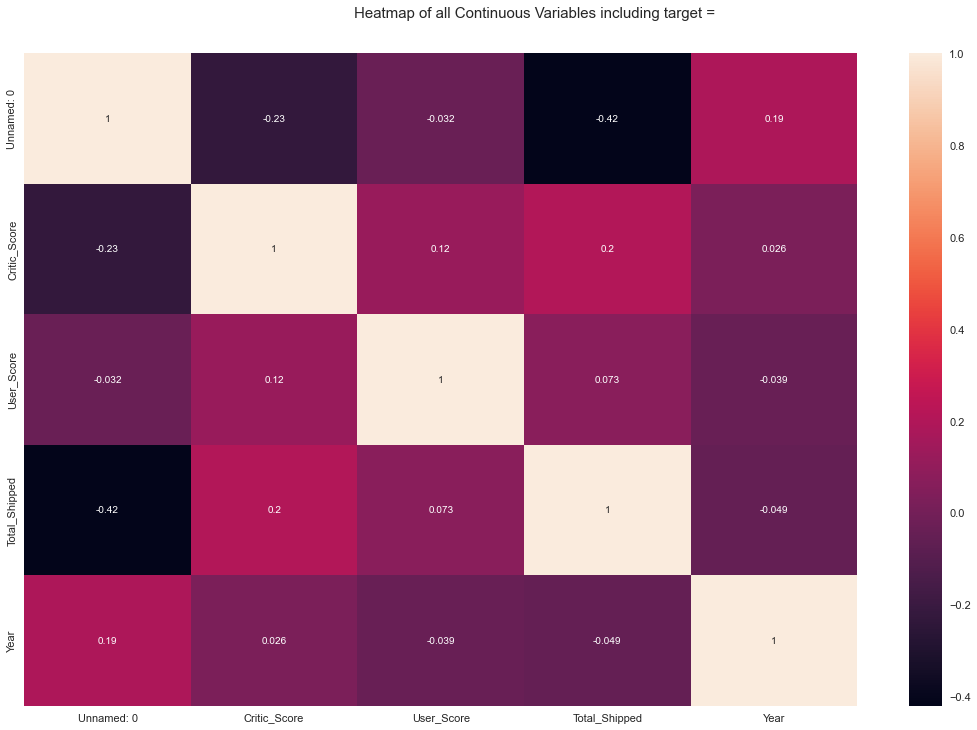

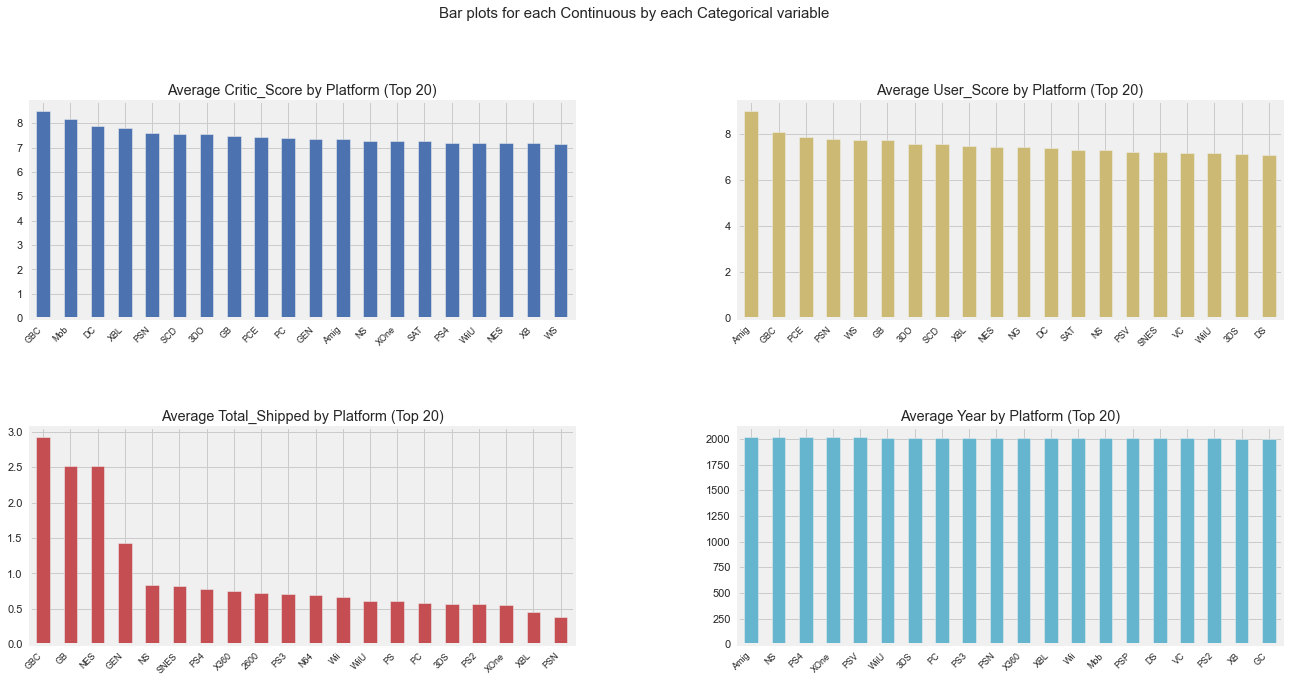

[nltk_data] Error loading popular: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>



**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt/PY3/english.pickle

  Searched in:
    - '/Users/roumyadas/nltk_data'
    - '/Users/roumyadas/anaconda3/nltk_data'
    - '/Users/roumyadas/anaconda3/share/nltk_data'
    - '/Users/roumyadas/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************

Could not draw wordcloud plot for Name

**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
  
  For more information see: 

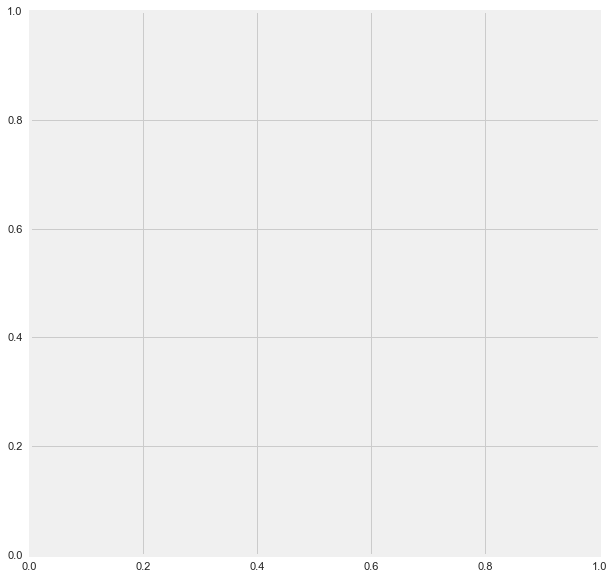

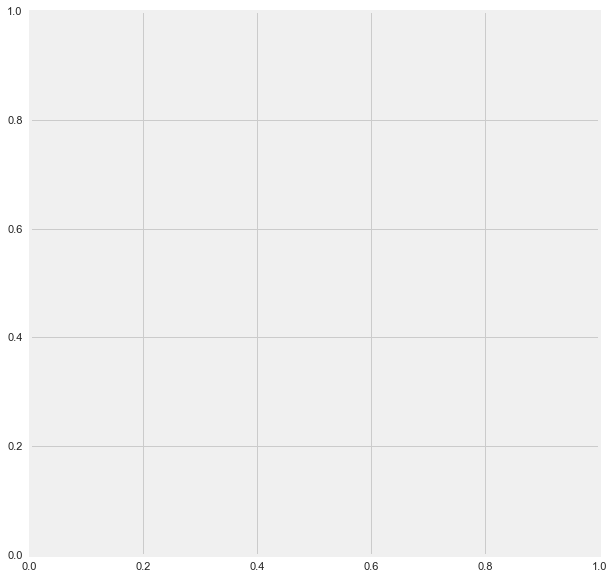

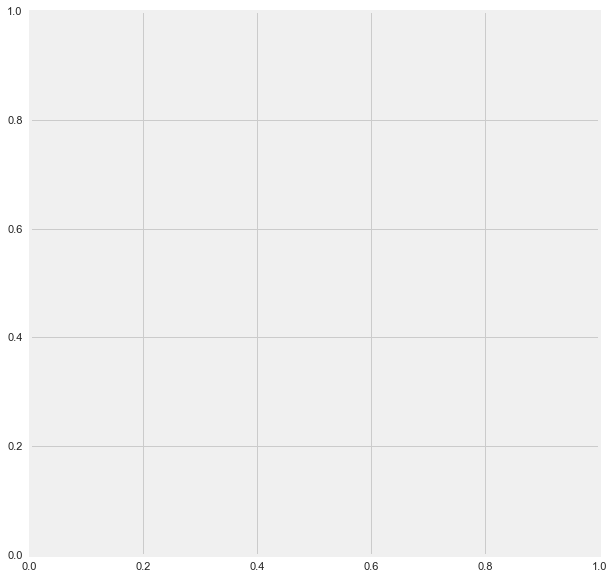

In [24]:
%matplotlib inline
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz('/Users/roumyadas/Desktop/game_sale.csv')


In [25]:
df4 = df4.iloc[:,1:9]

In [32]:
df4.isna().sum()

Name             0
Platform         0
Publisher        0
Developer        2
Critic_Score     0
User_Score       0
Total_Shipped    0
Year             0
dtype: int64

In [33]:
len(df4.Platform.unique()), len(df4.Publisher.unique()), len(df4.Developer.unique())

(37, 1012, 3055)

In [36]:
sum(pd.value_counts(df4.Developer)>10), sum(pd.value_counts(df4.Publisher)>10), \
sum(pd.value_counts(df4.Platform)>5)





(378, 187, 31)

In [90]:
Pub = pd.DataFrame(pd.value_counts(df4.Publisher).sort_values(ascending=False))

I = Pub[Pub.Publisher<=10].drop(labels='Publisher',axis=1)

In [37]:
pub_list = []
dev_list = []
plat_list = []



for i in df4.Publisher.unique():
    if len(df4[df4.Publisher==i])<=10:
        pub_list.append(i)

for i in df4.Developer.unique():
    if len(df4[df4.Developer==i])<=10:
        dev_list.append(i)

        
for i in df4.Platform.unique():
    if len(df4[df4.Platform==i])<=5:
        plat_list.append(i)        

In [38]:
len(dev_list),len(pub_list), len(plat_list)

(2677, 825, 6)

In [40]:
df_new = df4.replace(to_replace=dev_list,value='others')
df_new = df_new.replace(to_replace=pub_list, value= 'others')
df_new = df_new.replace(to_replace=plat_list, value= 'others')


In [42]:
df_new[(df_new.Platform=='others')&(df_new.Publisher=='others')&(df_new.Developer=='others')]

,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
6796,Talon Man Remastered,others,others,others,7.366667,9.000000,0.29,2018.0
10454,Doukyuusei,others,others,others,6.400000,7.733333,0.14,1995.0
16608,Blue Breaker: Ken Yorimo Hohoemi o,others,others,others,7.033333,5.733333,0.03,1996.0
17678,Sotsugyou II: Neo Generation Special,others,others,others,7.600000,8.100000,0.02,1995.0


In [65]:
def chi2_by_hand(df, col1, col2):    
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)
    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    print('---Observed (O)---')
    display(df_cont)
    #---create the expected value dataframe---
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()            
    print('---Expected (E)---')
    display(df_exp)
        
    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('---Chi-Square---')
    display(df_chi2)
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    from scipy import stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)
    
    return chi_square_score, degree_f, p



In [67]:
chi2_by_hand(df_new, 'Publisher','Platform')

Platform,2600,3DS,DC,DS,GB,GBA,GBC,GC,GEN,N64,...,SCD,SNES,WS,Wii,WiiU,X360,XB,XBL,XOne,others
Publisher,,,,,,,,,,,,,,,,,,,,,
2K Sports,0,0,0,9,0,2,0,1,0,0,...,0,0,0,21,1,40,9,0,9,0
505 Games,0,2,0,32,0,0,0,0,0,0,...,0,0,0,8,2,16,0,0,16,0
5pb,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,18,0,0,1,0
Acclaim Entertainment,0,0,0,0,0,12,0,25,3,32,...,0,3,0,0,0,0,21,0,0,0
Acquire,0,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vivendi Games,0,0,0,2,0,14,0,1,0,0,...,0,0,0,2,0,2,3,0,0,0
Warner Bros. Interactive,0,3,0,31,0,1,0,1,0,0,...,0,0,0,22,0,21,0,0,1,0
Working Designs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---Observed (O)---


Platform,2600,3DS,DC,DS,GB,GBA,GBC,GC,GEN,N64,...,SNES,WS,Wii,WiiU,X360,XB,XBL,XOne,others,Total
Publisher,,,,,,,,,,,,,,,,,,,,,
2K Sports,0,0,0,9,0,2,0,1,0,0,...,0,0,21,1,40,9,0,9,0,184
505 Games,0,2,0,32,0,0,0,0,0,0,...,0,0,8,2,16,0,0,16,0,119
5pb,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,18,0,0,1,0,100
Acclaim Entertainment,0,0,0,0,0,12,0,25,3,32,...,3,0,0,0,0,21,0,0,0,195
Acquire,0,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Warner Bros. Interactive,0,3,0,31,0,1,0,1,0,0,...,0,0,22,0,21,0,0,1,0,127
Working Designs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
Zoo Games,0,0,0,20,0,0,0,0,0,0,...,0,0,33,0,2,0,0,0,0,57


---Expected (E)---


Platform,2600,3DS,DC,DS,GB,GBA,GBC,GC,GEN,N64,...,SNES,WS,Wii,WiiU,X360,XB,XBL,XOne,others,Total
Publisher,,,,,,,,,,,,,,,,,,,,,
2K Sports,1.248571,5.811020,0.488163,21.131837,0.882449,8.045306,0.084490,5.266531,0.300408,3.004082,...,2.262449,0.065714,12.692245,1.511429,12.222857,7.848163,0.084490,5.0600,0.112653,184.0
505 Games,0.807500,3.758214,0.315714,13.666786,0.570714,5.203214,0.054643,3.406071,0.194286,1.942857,...,1.463214,0.042500,8.208571,0.977500,7.905000,5.075714,0.054643,3.2725,0.072857,119.0
5pb,0.678571,3.158163,0.265306,11.484694,0.479592,4.372449,0.045918,2.862245,0.163265,1.632653,...,1.229592,0.035714,6.897959,0.821429,6.642857,4.265306,0.045918,2.7500,0.061224,100.0
Acclaim Entertainment,1.323214,6.158418,0.517347,22.395153,0.935204,8.526276,0.089541,5.581378,0.318367,3.183673,...,2.397704,0.069643,13.451020,1.601786,12.953571,8.317347,0.089541,5.3625,0.119388,195.0
Acquire,0.108571,0.505306,0.042449,1.837551,0.076735,0.699592,0.007347,0.457959,0.026122,0.261224,...,0.196735,0.005714,1.103673,0.131429,1.062857,0.682449,0.007347,0.4400,0.009796,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Warner Bros. Interactive,0.861786,4.010867,0.336939,14.585561,0.609082,5.553010,0.058316,3.635051,0.207347,2.073469,...,1.561582,0.045357,8.760408,1.043214,8.436429,5.416939,0.058316,3.4925,0.077755,127.0
Working Designs,0.095000,0.442143,0.037143,1.607857,0.067143,0.612143,0.006429,0.400714,0.022857,0.228571,...,0.172143,0.005000,0.965714,0.115000,0.930000,0.597143,0.006429,0.3850,0.008571,14.0
Zoo Games,0.386786,1.800153,0.151224,6.546276,0.273367,2.492296,0.026173,1.631480,0.093061,0.930612,...,0.700867,0.020357,3.931837,0.468214,3.786429,2.431224,0.026173,1.5675,0.034898,57.0


---Chi-Square---


Platform,2600,3DS,DC,DS,GB,GBA,GBC,GC,GEN,N64,...,SNES,WS,Wii,WiiU,X360,XB,XBL,XOne,others,Total
Publisher,,,,,,,,,,,,,,,,,,,,,
2K Sports,1.248571,5.811020,0.488163,6.964916,0.882449,4.542490,0.084490,3.456409,0.300408,3.004082,...,2.262449,0.065714,5.437871,0.173054,63.125148,0.169049,0.084490,3.067905,0.112653,155.569453
505 Games,0.807500,0.822550,0.315714,24.592962,0.570714,5.203214,0.054643,3.406071,0.194286,1.942857,...,1.463214,0.042500,0.005300,1.069572,8.289567,5.075714,0.054643,49.500155,0.072857,150.417891
5pb,0.678571,1.474803,0.265306,11.484694,0.479592,4.372449,0.045918,2.862245,0.163265,1.632653,...,1.229592,0.035714,6.897959,0.821429,19.417051,4.265306,0.045918,1.113636,0.061224,289.227327
Acclaim Entertainment,1.323214,6.158418,0.517347,22.395153,0.935204,1.415244,0.089541,67.560901,22.587598,260.824699,...,0.151295,0.069643,13.451020,1.601786,12.953571,19.339062,0.089541,5.362500,0.119388,695.770905
Acquire,0.108571,0.484305,0.042449,0.014361,0.076735,0.699592,0.007347,0.457959,0.026122,0.261224,...,0.196735,0.005714,1.103673,0.131429,1.062857,0.682449,0.007347,0.440000,0.009796,39.814343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Warner Bros. Interactive,0.861786,0.254771,0.336939,18.472639,0.609082,3.733093,0.058316,1.910150,0.207347,2.073469,...,1.561582,0.045357,20.008975,1.043214,18.709733,5.416939,0.058316,1.778828,0.077755,106.208194
Working Designs,0.095000,0.442143,0.037143,1.607857,0.067143,0.612143,0.006429,0.400714,0.022857,0.228571,...,0.172143,0.005000,0.965714,0.115000,0.930000,0.597143,0.006429,0.385000,0.008571,117.798941
Zoo Games,0.386786,1.800153,0.151224,27.649723,0.273367,2.492296,0.026173,1.631480,0.093061,0.930612,...,0.700867,0.020357,214.901628,0.468214,0.842833,2.431224,0.026173,1.567500,0.034898,282.560751


(36996.88765528809, 3534, 0.0)

In [127]:
len(df_new.Year.unique())

44

In [43]:
df_cat = pd.get_dummies(df_new.drop(labels='Name', axis=1).iloc[:,[0,1,2,6]])
#print(df_cat)
df_cont = df_new.drop(labels='Total_Shipped',axis=1).iloc[:,4:6]


In [44]:
df_cat.head(2)

,Year,Platform_2600,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GBC,Platform_GC,Platform_GEN,...,Developer_Warthog,Developer_Webfoot Technologies,Developer_Yuke's Future Media Creators,Developer_Yuke's Media Creations,"Developer_Z-Axis, Ltd.",Developer_Zoe Mode,Developer_Zoo Games,Developer_n-Space,Developer_others,Developer_tri-Ace
0,2006.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1985.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
data = pd.merge(df_cat,df_cont,left_index=True, right_index=True).merge(df_new.Total_Shipped,left_index=True, right_index=True)


In [85]:
data.head(2)

,Year,Platform_2600,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GBC,Platform_GC,Platform_GEN,...,Developer_Yuke's Media Creations,"Developer_Z-Axis, Ltd.",Developer_Zoe Mode,Developer_Zoo Games,Developer_n-Space,Developer_others,Developer_tri-Ace,Critic_Score,User_Score,Total_Shipped
0,2006.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.7,8.0,82.90
1,1985.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10.0,8.2,40.24


In [96]:
x = data.drop(labels=['Total_Shipped'],axis=1)
y = data.Total_Shipped


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 34)

In [48]:
X_test.head(2)

,Year,Platform_2600,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GBC,Platform_GC,Platform_GEN,...,Developer_Yuke's Future Media Creators,Developer_Yuke's Media Creations,"Developer_Z-Axis, Ltd.",Developer_Zoe Mode,Developer_Zoo Games,Developer_n-Space,Developer_others,Developer_tri-Ace,Critic_Score,User_Score
8367,2009.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,6.1,6.733333
11287,2004.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,7.1,7.733333


In [49]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [51]:
rf = RandomForestRegressor().fit(X_train,y_train)


y_pred = rf.predict(X_test)
y_pred2 = rf.predict(X_train)

#print(lr.score(X_test,y_test)), print(lr.score(X_train,y_train))
regression_results(y_test,y_pred), regression_results(y_train,y_pred2)

explained_variance:  0.3812
r2:  0.3812
MAE:  0.419
MSE:  1.3234
RMSE:  1.1504
explained_variance:  0.8919
r2:  0.8919
MAE:  0.1712
MSE:  0.3257
RMSE:  0.5707


(None, None)

In [52]:
lr = LinearRegression().fit(X_train,y_train)


y_pred = lr.predict(X_test)
y_pred2 = lr.predict(X_train)

#print(lr.score(X_test,y_test)), print(lr.score(X_train,y_train))
regression_results(y_test,y_pred), regression_results(y_train,y_pred2)

explained_variance:  0.2147
r2:  0.2146
MAE:  0.5372
MSE:  1.6797
RMSE:  1.296
explained_variance:  0.2827
r2:  0.2827
MAE:  0.5331
MSE:  2.1605
RMSE:  1.4699


(None, None)

In [53]:
svr = SVR(kernel='rbf').fit(X_train,y_train)

y_pred = svr.predict(X_test)
y_pred2 = svr.predict(X_train)

regression_results(y_test,y_pred), regression_results(y_train,y_pred2)

explained_variance:  0.0012
r2:  -0.0545
MAE:  0.4686
MSE:  2.2552
RMSE:  1.5017
explained_variance:  0.0019
r2:  -0.0431
MAE:  0.4918
MSE:  3.1417
RMSE:  1.7725


(None, None)

In [54]:
gb = GradientBoostingRegressor().fit(X_train, y_train)

y_pred = gb.predict(X_test)
y_pred2 = gb.predict(X_train)

regression_results(y_test,y_pred), regression_results(y_train,y_pred2)

explained_variance:  0.3392
r2:  0.3391
MAE:  0.4784
MSE:  1.4133
RMSE:  1.1888
explained_variance:  0.5311
r2:  0.5311
MAE:  0.4628
MSE:  1.4123
RMSE:  1.1884


(None, None)

In [59]:
xgb = XGBRegressor().fit(X_train, y_train)
#learning_rate = 0.3, subsample= 0.5,colsample_bytree= 0.5, max_depth= 3, n_estimators= 20
y_pred = xgb.predict(X_test)
y_pred2 = xgb.predict(X_train)

regression_results(y_test,y_pred), regression_results(y_train,y_pred2)

explained_variance:  0.4156
r2:  0.4156
MAE:  0.4211
MSE:  1.2498
RMSE:  1.1179
explained_variance:  0.8256
r2:  0.8256
MAE:  0.3164
MSE:  0.5251
RMSE:  0.7247


(None, None)

/Users/roumyadas/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/roumyadas/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/roumyadas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/roumyadas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/roumyadas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/roumyadas/anaconda3/lib/python3.8/site-packages/sk

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(learning_rate = 0.3, subsample= 0.5)

params = { 'max_depth':[3,5,10],'colsample_bytree': [0.5,0.75,1], 'n_estimators':[20, 50, 100]}
gs_xgb = GridSearchCV(n_jobs=-1,estimator=xgb, 
                 param_grid=params, 
                 scoring='accuracy') 
gs_xgb.fit(X_train, y_train)

gs_xgb.best_params_

/Users/roumyadas/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/roumyadas/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/roumyadas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/roumyadas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/roumyadas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/roumyadas/anaconda3/lib/python3.8/site-packages/sk

{'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 20}

In [68]:
y_train.head()

2109     1.14
1383     1.60
3459     0.69
14783    0.05
1558     1.48
Name: Total_Shipped, dtype: float64

(array([1.4597e+04, 7.4000e+01, 1.7000e+01, 8.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e-02, 8.2990e+00, 1.6588e+01, 2.4877e+01, 3.3166e+01,
        4.1455e+01, 4.9744e+01, 5.8033e+01, 6.6322e+01, 7.4611e+01,
        8.2900e+01]),
 <BarContainer object of 10 artists>)

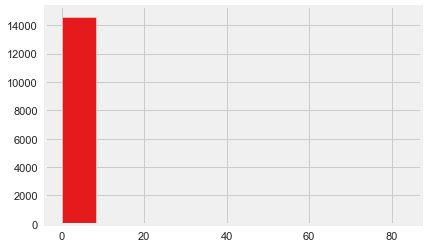

In [69]:
plt.hist(y_train)

In [98]:
y_train.head()

2109     1.14
1383     1.60
3459     0.69
14783    0.05
1558     1.48
Name: Total_Shipped, dtype: float64

In [99]:
y_train = np.log10(y_train)
y_test = np.log10(y_test)

In [100]:
y_train.head()

2109     0.056905
1383     0.204120
3459    -0.161151
14783   -1.301030
1558     0.170262
Name: Total_Shipped, dtype: float64

(array([1948., 2285., 2834., 3201., 2412., 1346.,  500.,  130.,   40.,
           4.]),
 array([-2.        , -1.60814455, -1.21628909, -0.82443364, -0.43257819,
        -0.04072273,  0.35113272,  0.74298817,  1.13484362,  1.52669908,
         1.91855453]),
 <BarContainer object of 10 artists>)

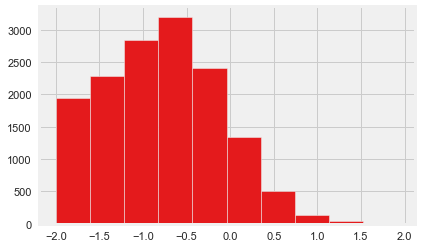

In [107]:
plt.hist(y_train)


y_train = (y_train - np.mean(y_train))/statistics.stdev(y_train)



y_test = (y_test - np.mean(y_train))/statistics.stdev(y_train)

In [101]:
xgb = XGBRegressor().fit(X_train, y_train)
#learning_rate = 0.3, subsample= 0.5,colsample_bytree= 0.5, max_depth= 3, n_estimators= 20
y_pred = xgb.predict(X_test)
y_pred2 = xgb.predict(X_train)

regression_results(y_test,y_pred), regression_results(y_train,y_pred2)

explained_variance:  0.4469
r2:  0.4469
MAE:  0.3872
MSE:  0.2441
RMSE:  0.4941
explained_variance:  0.5712
r2:  0.5712
MAE:  0.3406
MSE:  0.1938
RMSE:  0.4403


(None, None)

In [102]:
rf = RandomForestRegressor().fit(X_train,y_train)


y_pred = rf.predict(X_test)
y_pred2 = rf.predict(X_train)

#print(lr.score(X_test,y_test)), print(lr.score(X_train,y_train))
regression_results(y_test,y_pred), regression_results(y_train,y_pred2)

explained_variance:  0.4527
r2:  0.4525
MAE:  0.3775
MSE:  0.2416
RMSE:  0.4915
explained_variance:  0.9173
r2:  0.9173
MAE:  0.1473
MSE:  0.0374
RMSE:  0.1933


(None, None)

In [103]:
lr = LinearRegression().fit(X_train,y_train)


y_pred = lr.predict(X_test)
y_pred2 = lr.predict(X_train)

#print(lr.score(X_test,y_test)), print(lr.score(X_train,y_train))
regression_results(y_test,y_pred), regression_results(y_train,y_pred2)

explained_variance:  0.3577
r2:  0.3577
MAE:  0.4181
MSE:  0.2834
RMSE:  0.5324
explained_variance:  0.3979
r2:  0.3979
MAE:  0.4101
MSE:  0.2722
RMSE:  0.5217


(None, None)

In [141]:
df_new.head(3)

,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006.0
1,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985.0
2,Counter-Strike: Global Offensive,PC,others,others,8.0,7.5,40.00,2012.0


In [142]:
x = df_new.drop(labels=['Name','Total_Shipped'],axis=1)
y = df_new.Total_Shipped


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 34)

In [104]:
sgd = SGDRegressor().fit(X_train,y_train)

y_pred = sgd.predict(X_test)
y_pred2 = sgd.predict(X_train)

regression_results(y_test,y_pred), regression_results(y_train,y_pred2)

explained_variance:  -4.026671345786543e+25
r2:  -4.0587135915509356e+30
MAE:  1338292800580530.8
MSE:  1.7910453891422664e+30
RMSE:  1338299439266962.5
explained_variance:  -4.1806605377884295e+25
r2:  -3.9620001313739934e+30
MAE:  1338289501722403.2
MSE:  1.7910376892602294e+30
RMSE:  1338296562522757.8


(None, None)

In [105]:
gb = GradientBoostingRegressor().fit(X_train, y_train)

y_pred = gb.predict(X_test)
y_pred2 = gb.predict(X_train)

regression_results(y_test,y_pred), regression_results(y_train,y_pred2)

explained_variance:  0.3286
r2:  0.3286
MAE:  0.4357
MSE:  0.2963
RMSE:  0.5443
explained_variance:  0.3589
r2:  0.3589
MAE:  0.4309
MSE:  0.2898
RMSE:  0.5384


(None, None)

In [106]:
nb = GaussianNB().fit(X_train,y_train)


y_pred = nb.predict(X_test)
y_pred2 = nb.predict(X_train)

#print(lr.score(X_test,y_test)), print(lr.score(X_train,y_train))
regression_results(y_test,y_pred), regression_results(y_train,y_pred2)

ValueError: Unknown label type: (array([-2.        , -1.69897   , -1.52287875, -1.39794001, -1.30103   ,
       -1.22184875, -1.15490196, -1.09691001, -1.04575749, -1.        ,
       -0.95860731, -0.92081875, -0.88605665, -0.85387196, -0.82390874,
       -0.79588002, -0.76955108, -0.74472749, -0.7212464 , -0.69897   ,
       -0.67778071, -0.65757732, -0.63827216, -0.61978876, -0.60205999,
       -0.58502665, -0.56863624, -0.55284197, -0.537602  , -0.52287875,
       -0.50863831, -0.49485002, -0.48148606, -0.46852108, -0.45593196,
       -0.4436975 , -0.43179828, -0.4202164 , -0.40893539, -0.39794001,
       -0.38721614, -0.37675071, -0.36653154, -0.35654732, -0.34678749,
       -0.33724217, -0.32790214, -0.31875876, -0.30980392, -0.30103   ,
       -0.29242982, -0.28399666, -0.27572413, -0.26760624, -0.25963731,
       -0.25181197, -0.24412514, -0.23657201, -0.22914799, -0.22184875,
       -0.21467016, -0.20760831, -0.20065945, -0.19382003, -0.18708664,
       -0.18045606, -0.1739252 , -0.16749109, -0.16115091, -0.15490196,
       -0.14874165, -0.1426675 , -0.13667714, -0.13076828, -0.12493874,
       -0.11918641, -0.11350927, -0.1079054 , -0.10237291, -0.09691001,
       -0.09151498, -0.08618615, -0.08092191, -0.07572071, -0.07058107,
       -0.06550155, -0.06048075, -0.05551733, -0.05060999, -0.04575749,
       -0.04095861, -0.03621217, -0.03151705, -0.02687215, -0.02227639,
       -0.01772877, -0.01322827, -0.00877392, -0.00436481,  0.        ,
        0.00432137,  0.00860017,  0.01283722,  0.01703334,  0.0211893 ,
        0.02530587,  0.02938378,  0.03342376,  0.0374265 ,  0.04139269,
        0.04532298,  0.04921802,  0.05307844,  0.05690485,  0.06069784,
        0.06445799,  0.06818586,  0.07188201,  0.07554696,  0.07918125,
        0.08278537,  0.08635983,  0.08990511,  0.09342169,  0.09691001,
        0.10037055,  0.10380372,  0.10720997,  0.11058971,  0.11394335,
        0.1172713 ,  0.12057393,  0.12385164,  0.1271048 ,  0.13033377,
        0.13353891,  0.13672057,  0.13987909,  0.1430148 ,  0.14612804,
        0.14921911,  0.15228834,  0.15533604,  0.15836249,  0.161368  ,
        0.16435286,  0.16731733,  0.17026172,  0.17318627,  0.17609126,
        0.17897695,  0.18184359,  0.18469143,  0.18752072,  0.1903317 ,
        0.1931246 ,  0.19589965,  0.19865709,  0.20139712,  0.20411998,
        0.20682588,  0.20951501,  0.2121876 ,  0.21484385,  0.21748394,
        0.22010809,  0.22271647,  0.22530928,  0.2278867 ,  0.23044892,
        0.23299611,  0.23552845,  0.2380461 ,  0.24054925,  0.24303805,
        0.24551267,  0.24797327,  0.25042   ,  0.25285303,  0.25527251,
        0.25767857,  0.26007139,  0.26245109,  0.26481782,  0.26717173,
        0.26951294,  0.27184161,  0.27415785,  0.2764618 ,  0.2787536 ,
        0.28103337,  0.28330123,  0.28555731,  0.28780173,  0.29003461,
        0.29225607,  0.29446623,  0.29666519,  0.29885308,  0.30103   ,
        0.30319606,  0.30535137,  0.30749604,  0.30963017,  0.31175386,
        0.31386722,  0.31597035,  0.31806333,  0.32014629,  0.32221929,
        0.32428246,  0.32633586,  0.3283796 ,  0.33041377,  0.33243846,
        0.33445375,  0.33645973,  0.33845649,  0.34044411,  0.34242268,
        0.34439227,  0.34635297,  0.34830486,  0.35024802,  0.35218252,
        0.35410844,  0.35602586,  0.35793485,  0.35983548,  0.36172784,
        0.36361198,  0.36548798,  0.36735592,  0.36921586,  0.37106786,
        0.372912  ,  0.37474835,  0.37657696,  0.3783979 ,  0.38021124,
        0.38201704,  0.38381537,  0.38738983,  0.38916608,  0.39093511,
        0.39269695,  0.39445168,  0.39619935,  0.39794001,  0.39967372,
        0.40140054,  0.40312052,  0.40823997,  0.40993312,  0.41161971,
        0.41329976,  0.41497335,  0.41664051,  0.41830129,  0.41995575,
        0.42160393,  0.42324587,  0.42488164,  0.42651126,  0.43136376,
        0.43296929,  0.4345689 ,  0.43616265,  0.43775056,  0.43933269,
        0.44090908,  0.44247977,  0.4440448 ,  0.4456042 ,  0.44715803,
        0.44870632,  0.45024911,  0.45178644,  0.45331834,  0.45484486,
        0.45636603,  0.4578819 ,  0.45939249,  0.46089784,  0.462398  ,
        0.46389299,  0.46538285,  0.46686762,  0.46834733,  0.46982202,
        0.47129171,  0.47275645,  0.47421626,  0.47567119,  0.47712125,
        0.4785665 ,  0.48000694,  0.48287358,  0.48429984,  0.48713838,
        0.48855072,  0.48995848,  0.49136169,  0.49276039,  0.49415459,
        0.49554434,  0.49692965,  0.49968708,  0.50105926,  0.50242712,
        0.50379068,  0.50514998,  0.50650503,  0.50920252,  0.51054501,
        0.51188336,  0.51454775,  0.51587384,  0.5171959 ,  0.51851394,
        0.51982799,  0.52113808,  0.52244423,  0.52374647,  0.52633928,
        0.5276299 ,  0.5289167 ,  0.53147892,  0.53275438,  0.53402611,
        0.53529412,  0.53655844,  0.5390761 ,  0.54032947,  0.54157924,
        0.54282543,  0.54406804,  0.54530712,  0.54654266,  0.54777471,
        0.54900326,  0.55145   ,  0.55388303,  0.55509445,  0.5575072 ,
        0.55870857,  0.55990663,  0.56110138,  0.56229286,  0.56348109,
        0.56466606,  0.56937391,  0.57054294,  0.57170883,  0.57403127,
        0.57518784,  0.5774918 ,  0.5797836 ,  0.58319877,  0.58433122,
        0.58883173,  0.5899496 ,  0.59106461,  0.59217676,  0.59328607,
        0.59439255,  0.59549622,  0.59988307,  0.6009729 ,  0.60205999,
        0.60314437,  0.60745502,  0.60852603,  0.60959441,  0.61066016,
        0.61278386,  0.61384182,  0.61700034,  0.6180481 ,  0.61909333,
        0.62013605,  0.62117628,  0.62324929,  0.6242821 ,  0.62634037,
        0.62736586,  0.63042788,  0.63144377,  0.63346846,  0.63447727,
        0.63548375,  0.63748973,  0.64048144,  0.64147411,  0.64246452,
        0.64443859,  0.65127801,  0.65224634,  0.65321251,  0.65417654,
        0.65513843,  0.6560982 ,  0.65705585,  0.65896484,  0.6599162 ,
        0.66181269,  0.66275783,  0.66558099,  0.66931688,  0.67486114,
        0.67669361,  0.67760695,  0.67851838,  0.68033551,  0.68394713,
        0.68574174,  0.68841982,  0.69019608,  0.69108149,  0.6946052 ,
        0.69548168,  0.69635639,  0.69722934,  0.69897   ,  0.69983773,
        0.70070372,  0.70156799,  0.70586371,  0.70757018,  0.7084209 ,
        0.71011737,  0.71600334,  0.7176705 ,  0.71850169,  0.71933129,
        0.7201593 ,  0.72181062,  0.72427587,  0.72754126,  0.72835378,
        0.72997429,  0.73399929,  0.73479983,  0.73719264,  0.74036269,
        0.74350976,  0.74429298,  0.7458552 ,  0.7466342 ,  0.75281643,
        0.75511227,  0.75587486,  0.75891189,  0.76117581,  0.76267856,
        0.76641285,  0.77158748,  0.77670118,  0.77815125,  0.77959649,
        0.78175537,  0.78887512,  0.78958071,  0.79448805,  0.79726754,
        0.79934055,  0.80071708,  0.80140371,  0.80277373,  0.80550086,
        0.80617997,  0.8122447 ,  0.81291336,  0.81358099,  0.81491318,
        0.81756537,  0.81888541,  0.81954394,  0.82736927,  0.8286599 ,
        0.83378437,  0.83758844,  0.83821922,  0.83884909,  0.8488047 ,
        0.85308953,  0.85430604,  0.85551916,  0.8573325 ,  0.85793526,
        0.86093662,  0.86746749,  0.86981821,  0.87273883,  0.87679498,
        0.87966921,  0.88081359,  0.88649073,  0.8876173 ,  0.90091307,
        0.90308999,  0.90471555,  0.90794852,  0.91115761,  0.91487182,
        0.91907809,  0.92685671,  0.92839585,  0.93043959,  0.94051648,
        0.94250411,  0.94299959,  0.94841297,  0.96142109,  0.96848295,
        0.96894968,  0.96941591,  0.97034688,  0.97173959,  0.97358962,
        0.98181861,  0.99431715,  0.99869516,  1.        ,  1.00432137,
        1.00560945,  1.00603795,  1.01745073,  1.02325246,  1.02407499,
        1.02571538,  1.03342376,  1.03542974,  1.03901732,  1.04139269,
        1.04375513,  1.04493155,  1.0484418 ,  1.07003787,  1.07040732,
        1.07188201,  1.07591176,  1.07736791,  1.07809415,  1.07918125,
        1.09864373,  1.10037055,  1.10277661,  1.10380372,  1.10720997,
        1.1172713 ,  1.12057393,  1.12450422,  1.12515583,  1.12548127,
        1.1271048 ,  1.12742878,  1.1312978 ,  1.13987909,  1.14176323,
        1.14612804,  1.161368  ,  1.16554108,  1.16849748,  1.1708482 ,
        1.17260293,  1.1728947 ,  1.17609126,  1.19423675,  1.21005085,
        1.21085337,  1.2161659 ,  1.2278867 ,  1.23754374,  1.2380461 ,
        1.23979982,  1.24079877,  1.24723655,  1.25863728,  1.27207379,
        1.2750809 ,  1.27898212,  1.3248995 ,  1.35545152,  1.36361198,
        1.372912  ,  1.38021124,  1.39392601,  1.44746813,  1.45193987,
        1.47899913,  1.48086892,  1.48144263,  1.48855072,  1.49665294,
        1.52048353,  1.57194164,  1.60205999,  1.60465797,  1.91855453]),)

## PART 2

In [206]:
df4 = pd.read_csv('/Users/roumyadas/Desktop/game_sale.csv')
df4 = df4.iloc[:,1:9]
pub_list = []
dev_list = []
plat_list = []



for i in df4.Publisher.unique():
    if len(df4[df4.Publisher==i])<=10:
        pub_list.append(i)

for i in df4.Developer.unique():
    if len(df4[df4.Developer==i])<=10:
        dev_list.append(i)

        
for i in df4.Platform.unique():
    if len(df4[df4.Platform==i])<=5:
        plat_list.append(i)        

df_new = df4.replace(to_replace=dev_list,value='others')
df_new = df_new.replace(to_replace=pub_list, value= 'others')
df_new = df_new.replace(to_replace=plat_list, value= 'others')


In [186]:
df_new.head(2)

,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006.0
1,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985.0


(array([  15.,   52.,  102.,  456., 1160., 2869., 6089., 6848., 1798.,
         211.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

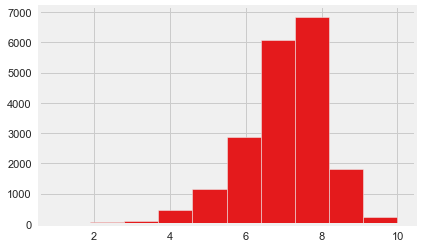

In [187]:
plt.hist(df_new.User_Score)

(array([  29.,  114.,  279.,  592., 1340., 2992., 5199., 5389., 3135.,
         531.]),
 array([ 0.8 ,  1.72,  2.64,  3.56,  4.48,  5.4 ,  6.32,  7.24,  8.16,
         9.08, 10.  ]),
 <BarContainer object of 10 artists>)

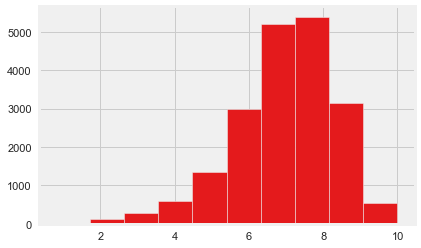

In [188]:
plt.hist(df_new.Critic_Score)

In [189]:
df_new.corr(method='kendall')

,Critic_Score,User_Score,Total_Shipped,Year
Critic_Score,1.000000,0.086612,0.166641,0.012067
User_Score,0.086612,1.000000,0.025273,-0.009350
Total_Shipped,0.166641,0.025273,1.000000,-0.115670
Year,0.012067,-0.009350,-0.115670,1.000000


In [208]:
bins = [0,5,6,7,8.5,10]
labels = []
for i in range(5):
    labels.append('class_'+str(i+1))

#labels


df_new.User_Score = pd.cut(df_new.User_Score , bins=bins, labels=labels, include_lowest=True)
df_new.Critic_Score = pd.cut(df_new.Critic_Score , bins=bins, labels=labels, include_lowest=True)


bins = [0,0.25,0.5,0.75,1]

np.unique(np.quantile(df_new.User_Score,bins))

labels = []
for i in range(4):
    labels.append('class_'+str(i+1))

#labels


df_new.User_Score = pd.cut(df_new.User_Score , bins=bins, labels=labels, include_lowest=True)
df_new.Critic_Score = pd.cut(df_new.Critic_Score , bins=bins, labels=labels, include_lowest=True)




In [209]:
df_new.User_Score.unique()

['class_4', 'class_5', 'class_1', 'class_3', 'class_2']
Categories (5, object): ['class_1' < 'class_2' < 'class_3' < 'class_4' < 'class_5']

In [210]:
df_new.head(3)

,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,Wii Sports,Wii,Nintendo,Nintendo EAD,class_4,class_4,82.90,2006.0
1,Super Mario Bros.,NES,Nintendo,Nintendo EAD,class_5,class_4,40.24,1985.0
2,Counter-Strike: Global Offensive,PC,others,others,class_4,class_4,40.00,2012.0


In [211]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(df_new.User_Score)
le2 = LabelEncoder().fit(df_new.Critic_Score)

df_new.User_Score = le.fit_transform(df_new.User_Score)
df_new.Critic_Score = le2.fit_transform(df_new.Critic_Score)


In [212]:
pd.value_counts(df_new.Critic_Score)

3    8299
2    5007
1    2447
4    1997
0    1850
Name: Critic_Score, dtype: int64

In [213]:
df_new.head()

,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,Wii Sports,Wii,Nintendo,Nintendo EAD,3,3,82.90,2006.0
1,Super Mario Bros.,NES,Nintendo,Nintendo EAD,4,3,40.24,1985.0
2,Counter-Strike: Global Offensive,PC,others,others,3,3,40.00,2012.0
3,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,3,4,37.32,2008.0
4,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,others,others,4,0,36.60,2017.0


In [214]:
df_new.Total_Shipped = np.log10(df_new.Total_Shipped)

In [215]:
df_cat = pd.get_dummies(df_new.drop(labels='Name', axis=1).iloc[:,[0,1,2,6]])
#print(df_cat)
#df_cont = df_new.drop(labels='Total_Shipped',axis=1).iloc[:,4:6]


df_cat.head(2)






,Year,Platform_2600,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GBC,Platform_GC,Platform_GEN,...,Developer_Warthog,Developer_Webfoot Technologies,Developer_Yuke's Future Media Creators,Developer_Yuke's Media Creations,"Developer_Z-Axis, Ltd.",Developer_Zoe Mode,Developer_Zoo Games,Developer_n-Space,Developer_others,Developer_tri-Ace
0,2006.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1985.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
data = pd.merge(df_cat,df_new.Total_Shipped,left_index=True, right_index=True).merge(df_new.User_Score,\
                                                                                    left_index=True, right_index=True)\
.merge(df_new.Critic_Score,left_index=True, right_index=True )

#data.head(2)

x = data.drop(labels=['Total_Shipped'],axis=1)
y = data.Total_Shipped


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 34)


In [217]:
X_train.head()

,Year,Platform_2600,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GBC,Platform_GC,Platform_GEN,...,Developer_Yuke's Future Media Creators,Developer_Yuke's Media Creations,"Developer_Z-Axis, Ltd.",Developer_Zoe Mode,Developer_Zoo Games,Developer_n-Space,Developer_others,Developer_tri-Ace,User_Score,Critic_Score
2109,2017.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
1383,2011.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,3
3459,2003.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,3,4
14783,2010.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3,2
1558,2004.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4


In [201]:
xgb = XGBRegressor().fit(X_train, y_train)
#learning_rate = 0.3, subsample= 0.5,colsample_bytree= 0.5, max_depth= 3, n_estimators= 20
y_pred = xgb.predict(X_test)
y_pred2 = xgb.predict(X_train)

regression_results(y_test,y_pred), regression_results(y_train,y_pred2)




explained_variance:  0.4337
r2:  0.4337
MAE:  0.3913
MSE:  0.2499
RMSE:  0.4999
explained_variance:  0.5396
r2:  0.5396
MAE:  0.3538
MSE:  0.2081
RMSE:  0.4562


(None, None)

In [202]:
rf = RandomForestRegressor().fit(X_train,y_train)


y_pred = rf.predict(X_test)
y_pred2 = rf.predict(X_train)

#print(lr.score(X_test,y_test)), print(lr.score(X_train,y_train))
regression_results(y_test,y_pred), regression_results(y_train,y_pred2)


explained_variance:  0.3918
r2:  0.3917
MAE:  0.3933
MSE:  0.2684
RMSE:  0.5181
explained_variance:  0.8414
r2:  0.8414
MAE:  0.1879
MSE:  0.0717
RMSE:  0.2677


(None, None)

In [203]:
lr = LinearRegression().fit(X_train,y_train)


y_pred = lr.predict(X_test)
y_pred2 = lr.predict(X_train)

#print(lr.score(X_test,y_test)), print(lr.score(X_train,y_train))
regression_results(y_test,y_pred), regression_results(y_train,y_pred2)



explained_variance:  0.3546
r2:  0.3546
MAE:  0.419
MSE:  0.2848
RMSE:  0.5337
explained_variance:  0.3936
r2:  0.3936
MAE:  0.4116
MSE:  0.2741
RMSE:  0.5236


(None, None)

In [204]:
svr = SVR(kernel='rbf').fit(X_train,y_train)

y_pred = svr.predict(X_test)
y_pred2 = svr.predict(X_train)

regression_results(y_test,y_pred), regression_results(y_train,y_pred2)



explained_variance:  0.0162
r2:  0.0161
MAE:  0.5314
MSE:  0.4342
RMSE:  0.6589
explained_variance:  0.0188
r2:  0.0187
MAE:  0.5377
MSE:  0.4436
RMSE:  0.666


(None, None)

In [205]:
gb = GradientBoostingRegressor().fit(X_train, y_train)

y_pred = gb.predict(X_test)
y_pred2 = gb.predict(X_train)

regression_results(y_test,y_pred), regression_results(y_train,y_pred2)

explained_variance:  0.3135
r2:  0.3135
MAE:  0.4392
MSE:  0.3029
RMSE:  0.5504
explained_variance:  0.343
r2:  0.343
MAE:  0.4359
MSE:  0.297
RMSE:  0.545


(None, None)